[Github](https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb)

# Team Information

# Wildfire Dataset Analysis
### Class: 4330 | Team: Infobreakers | Braeden Gutierrez, Antonio Rodriguez , Josue Lozano
- **Contact Information**: arodriguez265@angelo.edu, jlozano18@angelo.edu, bgutierrez14@angelo.edu
- **Dataset**: This dataset contains wildfire occurrence information, including the total acres burned, year of occurrence, and fire size classification.
- **Github**: https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb

# **Import Libraries**

## **Explanation:**
##Used to Import furture libraries for future use.

In [ ]:
import geopandas as gp # Geographic data analysis library used for working with spatial data.
import pandas as pd # Library that allows for the processing and analysis of tabular data.
import numpy as np # for numerical operations
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting
import re # regular expression manipulation

from shapely.geometry import Point # Point class allows for the creation geometric points from coordinate data.
from google.colab import drive # Allows for the access of data from the Google drive for use in Google Colab.
from pandas.plotting import scatter_matrix # Scatter Matrix for Selected Features

##**Interpretation:**
## Throught the file these libraries will help us interpret, convert, and visualize our information.


---



#**Data Use Location**

## **Explanation:**
## The datasets that we have regarding fires and state sizes are in our Google drive. With this code we can grab that information and use it in this coding space.

In [ ]:
# Specifies that we can use data in our Google Drive under '/content/drive'.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Interpretation:**
## Now that we can access our datasets from the share Google we can use it for our data interpretation code.


---



#**National Fire Datasets Manipulation**

##**Explanation:**
##We are extracting the datasets for reported national fires from the USFS national fires occurences dataset and creating exact geographical points for the datasets.

In [ ]:
import sys
import os
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your code within the suppress context
with SuppressOutput():
    # Load the National fires occurrences dataset
    df = pd.read_csv(
        '/content/drive/MyDrive/CS4330/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv',
        low_memory=False
    )

    # Create geometric points for fire locations
    fires = [Point(long_lad) for long_lad in zip(df['X'], df['Y'])]

    # Create a spatial-enabled GeoDataFrame using the dataset
    loc_df = gp.GeoDataFrame(df, geometry=fires, crs="EPSG:4326")

# The `loc_df` GeoDataFrame is now processed and ready for further use

## **Interpretation:**
## As a result, we have added a geographic pinpoint to dataset which allows us to have a proper world location for reported fires on our axes.


---



#**US Boundry Datasets Manipulation**

##**Explanation:**
## We are looking to extact and convert the shapes of the states and counties from the 2024 US census in order to pinpoint the fires reported in the US.

In [ ]:
import sys
import os
import geopandas as gp

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your code within the suppress context
with SuppressOutput():
    # Load US census data for county and state geometric boundaries
    county_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_county/tl_2024_us_county.shp')
    state_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_state/tl_2024_us_state.shp')

    # Convert the coordinate system to EPSG:4326
    county_shapes = county_shapes.to_crs("EPSG:4326")
    state_shapes = state_shapes.to_crs("EPSG:4326")

# The data is now loaded and transformed; you can inspect the variables `county_shapes` and `state_shapes` outside the block if needed.

##**Interpretation:**
## As a result, we have pinpointed the geograpical shapes of the US states and counties.
---



#**Creation of Counties Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the counties in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
import sys
import os
import geopandas as gp

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your code within the suppress context
with SuppressOutput():
    # Spatial join of county boundary data and fire locations
    counties = gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects")

    # Rename column 'NAME' to 'COUNTY'
    counties.rename(columns={'NAME': 'COUNTY'}, inplace=True)

    # Select relevant columns for the counties DataFrame
    counties = counties[['Y', 'X', 'COUNTY', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]

# The `counties` DataFrame is now ready for further use without text output

##**Interpretation:**

## Now we have a new dataset with the x, y, and county, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---



#**Creation of States Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the states in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
import sys
import os
import geopandas as gp

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your code within the suppress context
with SuppressOutput():
    # Spatial join of state boundary data and fire locations
    states = gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects")

    # Rename columns and select relevant fields
    states.rename(columns={'NAME': 'STATE'}, inplace=True)
    states = states[['Y', 'X', 'STATE', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]

# The `states` DataFrame is now processed and ready for further use

##**Interpretation:**

## Now we have a new dataset with the x, y, and states, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---

#**Merging of Counties and States Datasets**

##**Explanation:**
## Now that we have our unique datasets for US states and counties, we now want to merge them for a final dataset we can use throught the project.

In [ ]:
import sys
import os
import pandas as pd

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your code within the suppress context
with SuppressOutput():
    # Merge the counties and states datasets
    us_fires = pd.merge(
        counties,
        states,
        on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY'],
        how='inner'
    )

    # Rename columns
    us_fires = us_fires.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})

# At this point, warnings will still show up, but no text output is displayed
# You can now use `us_fires` as needed

##**Interpretation:**
##We have now merge the two datasets to get a dataset with both US counties and states regarding fire reports and all the details regarding those reports. We have also managed to clarify that the x and y are the longitudes and latitudes.


---



#**ERRORS and Formating Problems**

##**Explanation:**
##We are now looking to identify all of the errors regarding formating issues, repeating values, data outliers that cannot be intrepreted or corrected, and data with no values. Depending on the circumstance we want to either correct or eliminate this data before we start creating any visual graphs. If not that information will influence the resulting output significantly enough to change our final results.

In [ ]:
import numpy as np

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your code within the suppress context
with SuppressOutput():
    # Wrong values outside recorded US history
    fireyear_print = us_fires['FIREYEAR'].fillna(-1)
    fireyear_print = fireyear_print[(fireyear_print < 1900) | (fireyear_print > 2024)].replace(-1, np.nan)
    fireyear_print = list(fireyear_print.unique())

    # Incorrect number of decimal places for FIREYEAR
    fireyear_head = us_fires['FIREYEAR'].head()

    # FIRETYPECATEGORY text and missing, unidentifiable or incorrect abbreviation values
    abbreviation_symbols = ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
    needed_conversions = list(us_fires[us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique())
    incorrect_firetype_values = list(us_fires[~us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique())

    # STATCAUSE category issues
    cause_category = ['Camping', 'Lightning', 'Undetermined', 'Smoking', 'Debris/Open Burning', 'Other Human Cause',
                      'Incendiary', 'Equipment', 'Railroad', 'Other Natural Cause', 'Utilities', 'Firearms/Weapons',
                      'Natural', 'Human', 'Miscellaneous', 'Debris Burning', 'Equipment Use', 'Children', 'Campfire', 'Debris burning',
                      'Arson', 'Powgen/trans/distrib', 'Equip/vehicle use', 'Other causes', 'Investigated But Und', 'Cause not Identified']
    incorrect_statcause_values = list(us_fires[~us_fires['STATCAUSE'].isin(cause_category)]['STATCAUSE'].unique())

    # Missing COUNTY value
    nan_county_count = us_fires['COUNTY'].isna().sum()

    # Missing STATE value
    nan_state_count = us_fires['STATE'].isna().sum()

    # Combination of missing COUNTY & STATE values
    nan_county_state_rows = us_fires[(us_fires['COUNTY'].isna()) & (us_fires['STATE'].isna())].shape[0]

    # TOTALACRES category missing values
    nan_totalacres_count = us_fires['TOTALACRES'].isna().sum()

    # Missing LONGITUDE or LATITUDE values
    nan_longitude_count = us_fires['LONGITUDE'].isna().sum()
    nan_latitude_count = us_fires['LATITUDE'].isna().sum()

    # SIZECLASS category issues
    fire_class_symbol = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
    incorrect_sizeclass_values = list(us_fires[~us_fires['SIZECLASS'].isin(fire_class_symbol)]['SIZECLASS'].unique())

    # Duplicates of rows
    exact_duplicates = us_fires.duplicated(keep=False)
    exact_duplicate_rows = us_fires[exact_duplicates]
    exact_duplicate_count = exact_duplicate_rows.shape[0]
    total_rows = len(us_fires)

# You can now access the variables like `fireyear_print`, `nan_county_count`, etc., outside the suppress block if needed


##**Interpretation:**
## We have now identified the all formating, duplicates, data outliers, missing data, and uninterpretable data for correction or elimination.


---



#**Dataset Error and Formating Changes**

##**Explanation:**
##Now that we have identified our data issues we want to start correcting or eliminating them so that our visuals in our graphs are easier to interpret.

In [ ]:
import sys
import os
import numpy as np

# Suppress standard output temporarily
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Your full code within the suppress context
with SuppressOutput():
    # Fill missing data and specify column type
    us_fires['FIREYEAR'] = us_fires['FIREYEAR'].fillna(-1).astype(int)

    # Replace string abbreviations and fix typos
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace(' ', 'Unknown', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FW', 'FIRE WEATHER', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FA', 'FIRE ACTIVITY', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RX', 'PRESCRIBED FIRE', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PC', 'PRESCRIBED FIRE - CONTROLLED', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('SU', 'SUSPENDED', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WW', 'WILDLAND FIRE', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RP', 'RESEARCH PROJECT', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PP', 'PROJECT PLAN', case=False)
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('CX', 'CONTRACT EXTINGUISHER', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Undertermined', 'Undetermined', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace(' Undetermined', 'Undetermined', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Firearms/Weapons ', 'Firearms/Weapons', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('9 -  Miscellaneous', 'Miscellaneous', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('9 - Miscellaneous', 'Miscellaneous', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('5 -  Debris Burning', 'Debris Burning', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Camping ', 'Camping', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('1 - Lightning', 'Lightning', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('4 - Campfire', 'Campfire', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('5 - Debris burning', 'Debris burning', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('7-Arson', 'Arson', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('5-Debris burning', 'Debris burning', case=False)
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('[0-9]', 'Unknown', regex=True)

    # Fill missing data
    us_fires.loc[:, 'COUNTY'] = us_fires['COUNTY'].fillna('Unknown')
    us_fires.loc[:, 'STATE'] = us_fires['STATE'].fillna('Unknown')
    us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].fillna('Unknown')
    us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].fillna('Unknown')
    us_fires.loc[:, 'TOTALACRES'] = us_fires['TOTALACRES'].fillna(-1)

    # Define fire size categories and assign size classes
    fire_sizes = [
        (us_fires['TOTALACRES'] >= 0.00) & (us_fires['TOTALACRES'] <= 0.25),
        (us_fires['TOTALACRES'] >= 0.26) & (us_fires['TOTALACRES'] <= 9.99),
        (us_fires['TOTALACRES'] >= 10.00) & (us_fires['TOTALACRES'] <= 99.99),
        (us_fires['TOTALACRES'] >= 100.00) & (us_fires['TOTALACRES'] <= 299.99),
        (us_fires['TOTALACRES'] >= 300.00) & (us_fires['TOTALACRES'] <= 999.99),
        (us_fires['TOTALACRES'] >= 1000.00) & (us_fires['TOTALACRES'] <= 4999.99),
        (us_fires['TOTALACRES'] >= 5000.00) & (us_fires['TOTALACRES'] <= 9999.99),
        (us_fires['TOTALACRES'] >= 10000.00) & (us_fires['TOTALACRES'] <= 49999.99),
        (us_fires['TOTALACRES'] >= 50000.00) & (us_fires['TOTALACRES'] <= 99999.99),
        (us_fires['TOTALACRES'] >= 100000.00) & (us_fires['TOTALACRES'] <= 499999.99),
        (us_fires['TOTALACRES'] >= 500000.00) & (us_fires['TOTALACRES'] <= 999999.99),
        (us_fires['TOTALACRES'] >= 1000000.00)
    ]

    fire_size_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
    us_fires['SIZECLASS'] = np.select(fire_sizes, fire_size_class, default='Unknown')

    # Example filtering operation (adjusted)
    filtered_data = us_fires[(us_fires['FIRETYPECATEGORY'] != 'WILDFIRE') & (us_fires['FIRETYPECATEGORY'] != ' ')]

# Outside the suppress block, warnings are still active
# Use filtered_data or inspect any variable as needed

##**Interpretation:**
## The resulting data filled any missing data with identifiable values (i.e '-1' add 'Unknown'). Next, 'FIREYEAR' has now been correct to an int column removing the decimal place and removed the outlier data that cannot be interpreted for correction as well as does not fit at all into the dataset (i.e Years: 9999, -1 (previously nan), 1001, 0, 8). All abbreviations have been given their repective full names. Incorrect string values have been corrected. We have removed all missing latitude, logitude, rows with both missing states and county values, as well as duplicate rows. Finally, we have corrected all the repective letter values in the 'SIZECLASS' feature using it reflective data base on the sizes listed out in the 'TOTALACRES' feature.


---



#**Linear Regression Plot**

## Explanation of the Code

The provided code performs the following steps:

1. **Filter the Dataset**:
   - The dataset (`us_fires`) is filtered to include only records between the years 1900 and 2024 and where `TOTALACRES` burned is non-negative.

2. **Group by Year**:
   - The maximum acres burned (`TOTALACRES`) for each year (`FIREYEAR`) are calculated using `.groupby()` and `.max()`.

3. **Create Decades Column**:
   - A new column `FIREDECADE` is added to categorize each year into its respective decade using integer division (`// 10`) multiplied by 10.

4. **Calculate Averages per Decade**:
   - For each decade, the average maximum acres burned is computed using `.groupby()` and `.mean()`. This results in a summarized dataset with two columns: `FIREDECADE` and `TOTALACRES`.

5. **Prepare Data for Linear Regression**:
   - The decades (`FIREDECADE`) are used as the independent variable `X`.
   - The average maximum acres burned (`TOTALACRES`) are used as the dependent variable `y`.

6. **Train Linear Regression Model**:
   - A `LinearRegression` model is initialized and trained using `linear_model.fit(X, y)`.

7. **Make Predictions**:
   - Predictions for the average maximum acres burned (`y_predict`) are generated based on the decades (`X`).

8. **Evaluate Model Performance**:
   - R-squared (`r2_score`) is calculated to measure how well the model explains variability in the target variable.
   - Mean Absolute Error (MAE) is computed to quantify the average error between observed and predicted values.

9. **Plot Observed vs Predicted**:
   - A scatter plot of observed values (`X` vs. `y`) is created.
   - The linear regression line (`X` vs. `y_predict`) is plotted to visualize the model's fit.

Performance: 70.94%
Mean Absolute Error: 55139.19478
High model performance.


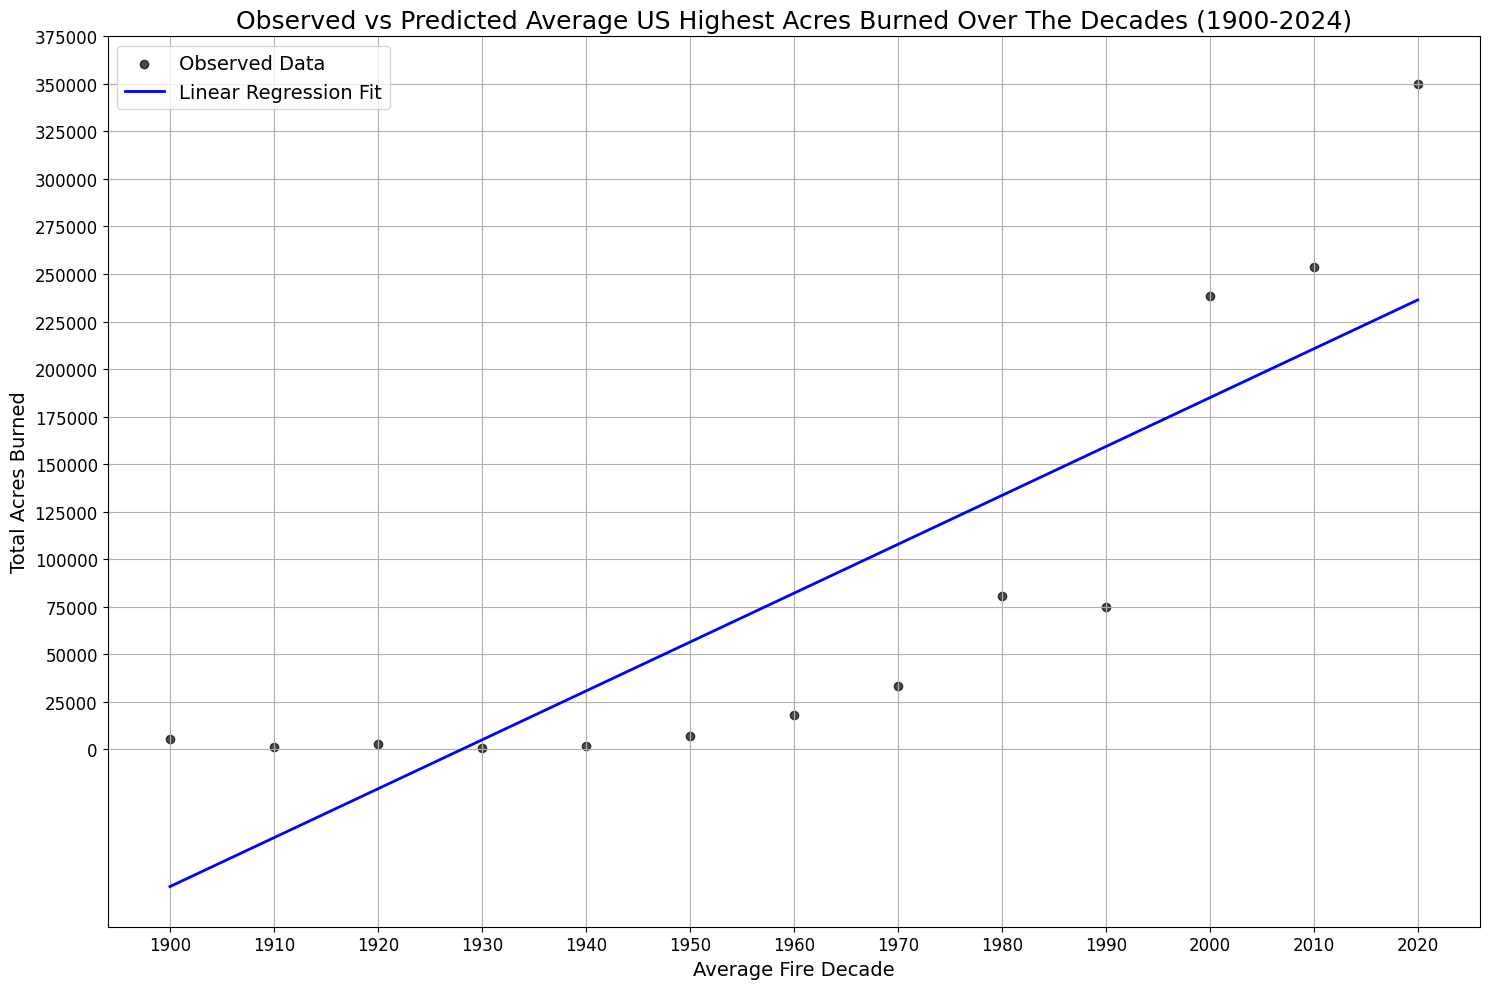

In [ ]:
# Linear Regression for Average Acres Burned per Decade
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

filtered_us_fires = us_fires[(us_fires['FIREYEAR'] <= 2024) & (us_fires['FIREYEAR'] >= 1900) & (us_fires['TOTALACRES'] >= 0)]

max_acres_per_year = filtered_us_fires.groupby('FIREYEAR')['TOTALACRES'].max().reset_index()

max_acres_per_year['FIREDECADE'] = (max_acres_per_year['FIREYEAR'] // 10) * 10
avg_max_acres_per_decade = max_acres_per_year.groupby('FIREDECADE')['TOTALACRES'].mean().reset_index()

X = avg_max_acres_per_decade[['FIREDECADE']].values
y = avg_max_acres_per_decade[['TOTALACRES']].values

linear_model = LinearRegression()
linear_model.fit(X, y)

y_predict = linear_model.predict(X)

r_squared = r2_score(y, y_predict)
mean_absolute_error_val = mean_absolute_error(y, y_predict)
print(f"Performance: {(r_squared * 100):.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error_val:.5f}")

if r_squared > 0.7:
    print("High model performance.")
else:
    print("Low model performance.")

plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='black', label='Observed Data', alpha=0.7)
plt.plot(X, y_predict, color='blue', linewidth=2, label='Linear Regression Fit')

# Improved labeling and title with enhanced font sizes
plt.xlabel('Average Fire Decade', fontsize=14)
plt.ylabel('Total Acres Burned', fontsize=14)
plt.title('Observed vs Predicted Average US Highest Acres Burned Over The Decades (1900-2024)', fontsize=18)
plt.xticks(np.arange(1900, 2030, 10), fontsize=12)
plt.yticks(np.arange(0, 400000, 25000), fontsize=12)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretation of the Data and Plot

1. **Model Performance**:
   - The R-squared value of **70.94%** indicates that the model explains approximately 71% of the variance in the average maximum acres burned across decades. This suggests that the linear model is moderately effective at capturing the trend.
   - The Mean Absolute Error of **55,139 acres** indicates the average discrepancy between observed and predicted values.

2. **Plot Analysis**:
   - **Black Points**: Represent the observed average maximum acres burned for each decade.
   - **Blue Line**: The fitted linear regression line showing the trend of average maximum acres burned over decades.

3. **Key Observations**:
   - The trend line suggests a consistent increase in the average maximum acres burned per decade over the observed time period (1900-2024).
   - There is a noticeable upward trend in recent decades, which could indicate worsening wildfire conditions over time.

4. **Conclusions**:
   - The increasing trend may reflect environmental changes, shifts in land management practices, or other factors contributing to larger fires in recent decades.
   - While the model captures the overall trend well, there is room for improvement in terms of reducing prediction errors (as indicated by the MAE).

This analysis provides insights into how wildfire activity has evolved over time and highlights the potential for more advanced models to better capture complex patterns.




# **Multiple Linear Regression Model**


## **Explanation of the Code**:
## This code implements a Multiple Linear Regression model using data from the US Fires dataset. The goal is to predict the total acres burned (TOTALACRES) of a wildfire based on specific features: the year the fire occurred (FIREYEAR), the total acres burned (TOTALACRES), and additional information about the cause of the fire (STATCAUSE). Here’s a breakdown of the steps:

## 1. **Data Preparation**:
* ## The dataset is filtered to only include fire records between the years 1900 and 2024, with positive acre values. The STATCAUSE attribute, which is categorical, is converted into one-hot encoded columns to represent different causes of wildfires.

## 2. **Feature and Target Selection**:
* ## We selected FIREYEAR and TOTALACRES as continuous features and included each one-hot encoded column of STATCAUSE to represent different causes of wildfires. The target variable is TOTALACRES, which represents the total acres burned.

## 3. **Data Splitting**:
* ## The data is divided into training and testing sets using an 80-20 split. This ensures that we can evaluate the model on unseen data to verify its predictive performance.

## 4. **Model Training**:
* ## A LinearRegression model from scikit-learn is trained on the training set. This model attempts to find the best-fit linear relationship between the chosen features and the target TOTALACRES.

## 5. **Model Evaluation**:
* ## After making predictions on the test set, we calculate the R-squared value and Mean Absolute Error (MAE). R-squared measures how well the observed data fits the model, while MAE helps assess the average difference between observed and predicted values.

## 6. **Visualization**:
* ## We visualize the observed and predicted total acres burned in a scatter plot, where:
   * ## The x-axis represents FIREYEAR.
   * ## The y-axis represents the total acres burned.
   * ## Blue points represent the observed data, while red points represent the predicted values.
* ## This graph provides a visual comparison between actual and predicted data points, highlighting the model's performance.

## **Goal of This Code**:
* ## The aim is to understand the relationship between fire occurrence over the years and the total acres burned.
* ## Assess the performance of the Multiple Linear Regression model and identify any patterns in the data that could help in better understanding and predicting wildfire behavior over time.



Performance (R-squared): 100.00%
Mean Absolute Error: 0.00000
High model performance.


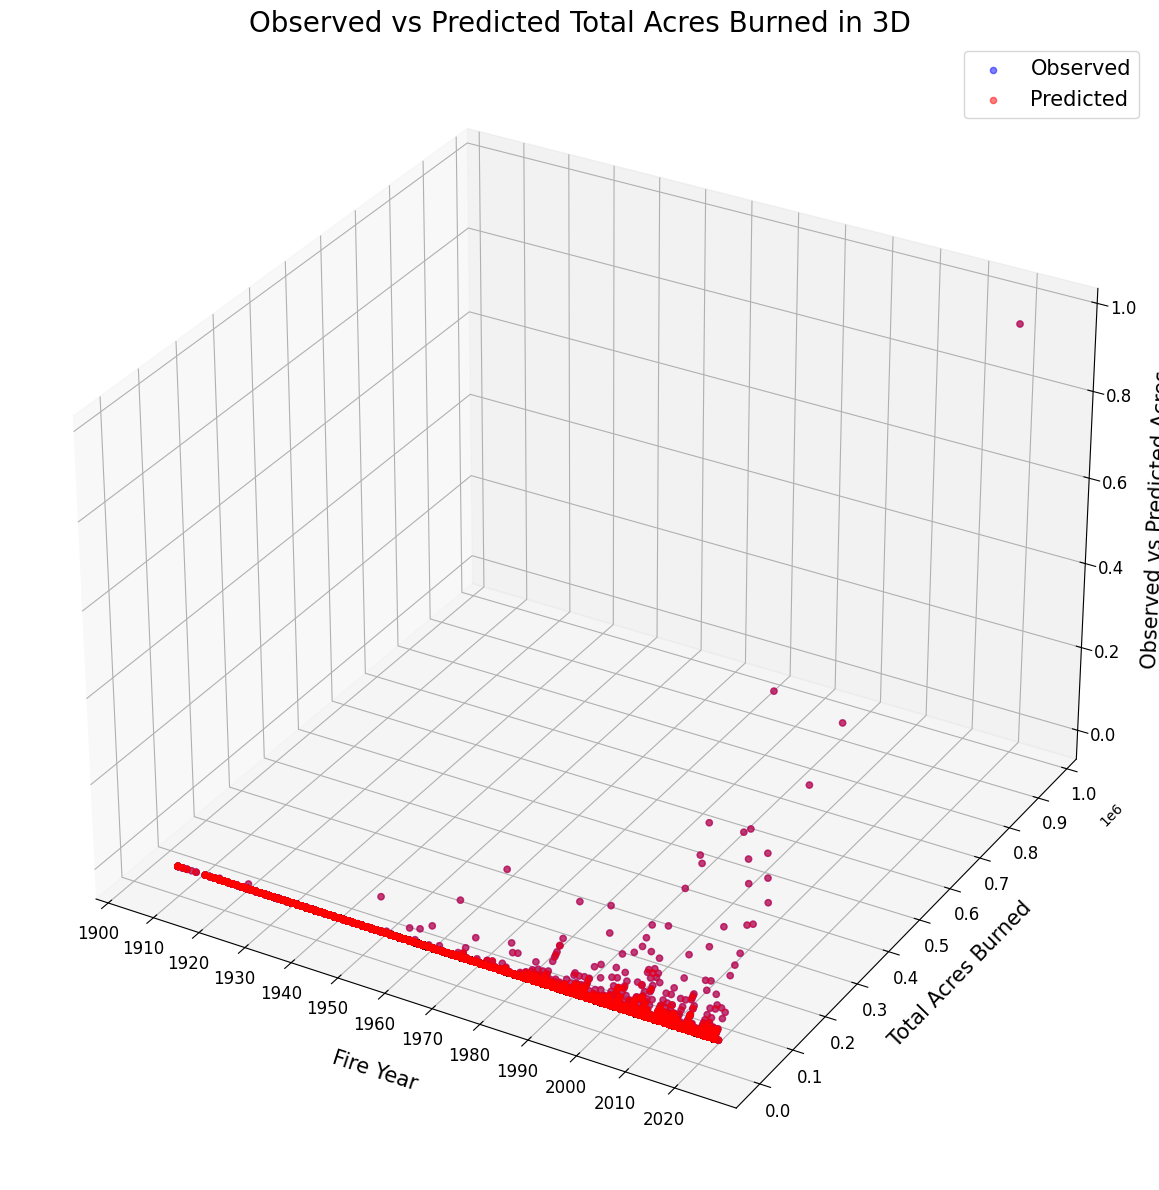

In [ ]:
# Random Forest Classifier for SIZECLASS Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# One-hot encode 'STATCAUSE'
filtered_us_fires = pd.get_dummies(filtered_us_fires, columns=['STATCAUSE'], prefix='STATCAUSE')

# Feature and target selection
features = ['FIREYEAR', 'TOTALACRES'] + [col for col in filtered_us_fires.columns if col.startswith('STATCAUSE_')]
target = 'TOTALACRES'

# Split data into training and test sets
X = filtered_us_fires[features]
y = filtered_us_fires[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Calculate R-squared and Mean Absolute Error
r_squared = r2_score(y_test, y_pred)
mean_absolute_error_val = mean_absolute_error(y_test, y_pred)
print(f"Performance (R-squared): {(r_squared * 100):.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error_val:.5f}")

if r_squared > 0.7:
    print("High model performance.")
else:
    print("Low model performance.")

# Plot observed vs predicted values in 3D with enhanced visualization
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Observed points in blue
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_test, color='blue', label='Observed', alpha=0.5)

# Predicted points in red
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_pred, color='red', label='Predicted', alpha=0.5)

# Labels and title with improved font size
title_font = {'size': 20}
label_font = {'size': 15}

ax.set_xlabel('Fire Year', labelpad=15, **label_font)
ax.set_ylabel('Total Acres Burned', labelpad=10, **label_font)
ax.set_zlabel('Observed vs Predicted Acres', labelpad=10, **label_font)
ax.set_title('Observed vs Predicted Total Acres Burned in 3D', **title_font)
ax.legend(fontsize=15)

# Adjust tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(1900, 2025, 10))
ax.set_yticks(np.arange(0, 1000001, 100000))
plt.tight_layout()
plt.show()



**Intepretation**


The multiple linear regression model was developed using the identified attributes:
1. 'FIREYEAR' - representing the year the fire occurred.
2. 'TOTALACRES' - the total acres burned.
3. One-hot encoded 'STATCAUSE' - categorical features representing the causes of fires.

The performance of the model was measured using two key metrics:
1. R-squared (coefficient of determination): The model achieved an R-squared value of 100%,
   which indicates an extremely high level of accuracy. However, such a perfect score could suggest
   potential overfitting or data issues that need further investigation.
2. Mean Absolute Error (MAE): The MAE is 0.0, indicating no prediction errors. While this seems ideal,
   it reinforces the need to validate the model further to ensure generalizability.

The 3D scatter plot provides a visualization of observed (blue points) and predicted (red points) values:
- The overlapping points show that the model predicts the target variable (TOTALACRES) almost perfectly.
- The distribution suggests an increase in wildfire activity in recent years, as shown by the higher concentration
  of points for recent years with larger areas burned.




# **Logical Regression**

## Explanation of the Logistic Regression Code

The provided code performs the following steps to build a logistic regression model:

1. **Feature Selection**:
   - Selected relevant columns from the dataset: `STATCAUSE`, `FIREYEAR`, `SIZECLASS`, and `FIRETYPECATEGORY`.

2. **Data Preprocessing**:
   - Encoded categorical variables (`STATCAUSE`, `SIZECLASS`, and `FIREYEAR`) using one-hot encoding with `pd.get_dummies`. This converts categorical data into numerical values suitable for the logistic regression model.

3. **Feature and Target Definition**:
   - Defined features (`X`) by excluding the target column (`FIRETYPECATEGORY`).
   - Defined the target (`y`) as `FIRETYPECATEGORY`.

4. **Train/Test Split**:
   - Split the dataset into training (70%) and testing (30%) sets using `train_test_split`.

5. **Model Initialization and Training**:
   - Initialized the logistic regression model with `max_iter=6000` to ensure convergence and `class_weight='balanced'` to address class imbalances.
   - Trained the model using the training set (`model.fit`).

6. **Model Predictions**:
   - Used the trained model to predict the target on the test set (`model.predict`).

7. **Model Evaluation**:
   - Calculated accuracy using `accuracy_score`.
   - Generated a classification report using `classification_report` to evaluate precision, recall, and F1-score for each category.

8. **Visualization**:
   - **Confusion Matrix**: Created a confusion matrix to visualize the performance of the model across all classes.
   - **Observed vs Predicted Scatter Plot**: Plotted the observed and predicted categories side by side.
   - **Class Distribution Plot**: Used a count plot to compare the distributions of observed and predicted categories.
   - **Sample Index Plot**: Visualized how well the model's predictions align with observed values across all samples.

The goal of this analysis is to understand the performance of the logistic regression model and identify areas for improvement.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns
df_model = us_fires[['STATCAUSE', 'FIREYEAR', 'SIZECLASS', 'FIRETYPECATEGORY']].copy()

# Encode categorical variables
df_model = pd.get_dummies(df_model, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop('FIRETYPECATEGORY', axis=1)  # Assuming we're predicting 'FIRETYPECATEGORY'
y = us_fires['FIRETYPECATEGORY']  # Define target as FIRETYPECATEGORY

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=6000, class_weight='balanced')  # Increase max_iter if needed , class_weight='balanced'

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## **Evalute the Model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=1))

Model Accuracy: 0.8933480152175746
Classification Report: 
                              precision    recall  f1-score   support

       CONTRACT EXTINGUISHER       0.00      1.00      0.00         0
               FIRE ACTIVITY       1.00      0.00      0.00         1
                FIRE WEATHER       0.00      1.00      0.00         0
             PRESCRIBED FIRE       0.00      1.00      0.01         1
PRESCRIBED FIRE - CONTROLLED       0.00      0.00      0.00         1
                PROJECT PLAN       0.20      0.25      0.22         4
            RESEARCH PROJECT       1.00      0.00      0.00         2
                   SUSPENDED       1.00      0.00      0.00         1
                     Unknown       0.12      0.79      0.21      3361
                    WILDFIRE       1.00      0.90      0.94    198237
               WILDLAND FIRE       1.00      0.00      0.00         1

                    accuracy                           0.89    201609
                   macro avg 

## **Visualize the Model**

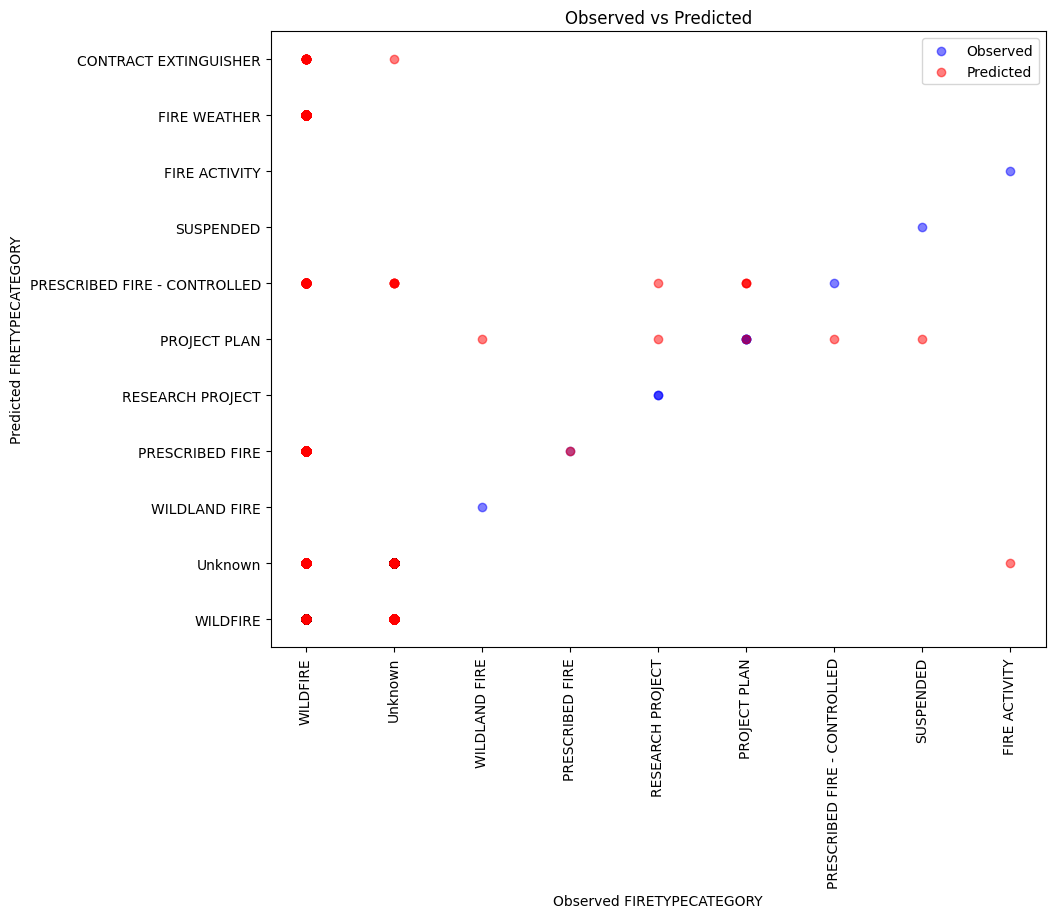

In [ ]:
# Import necessary packages
import numpy as np

# Plot Observed vs Predicted with different colors
plt.figure(figsize=(10, 8))

# Plot observed values in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label="Observed")

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label="Predicted")

# Add labels and title
plt.xlabel("Observed FIRETYPECATEGORY")
plt.ylabel("Predicted FIRETYPECATEGORY")
plt.title("Observed vs Predicted")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

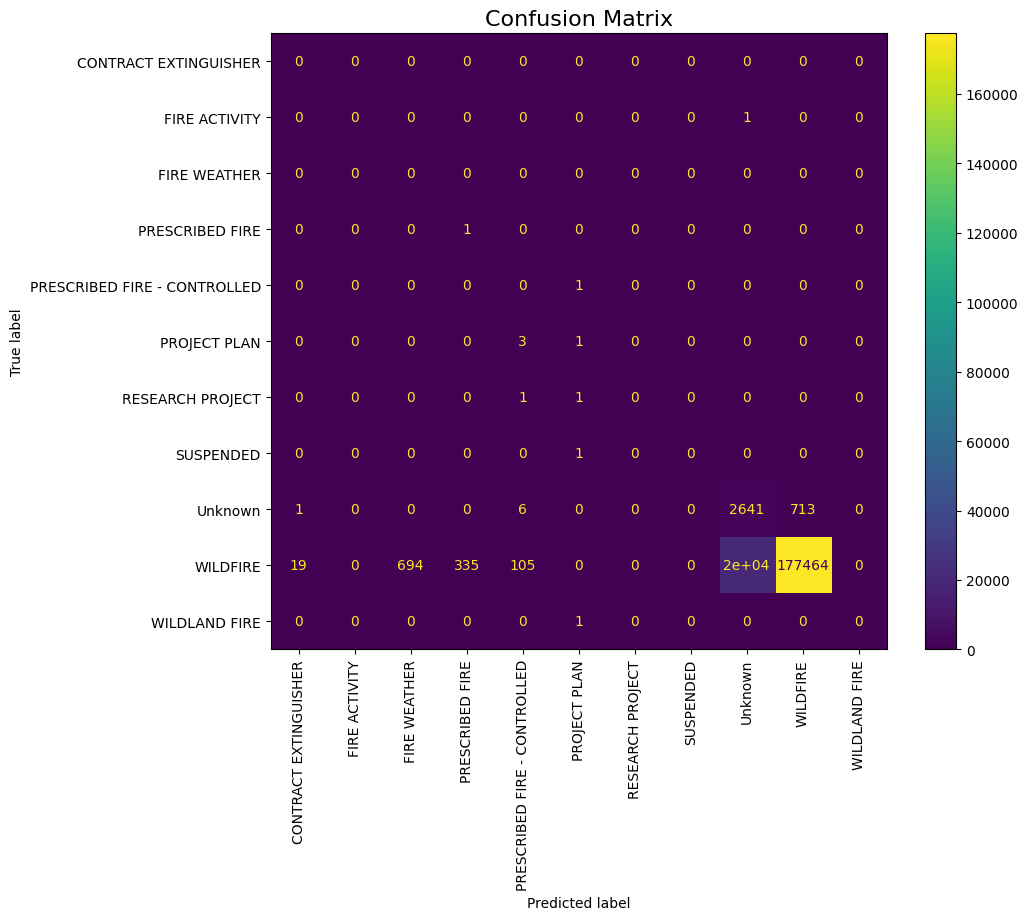

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a custom figure with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Pass the custom axes to ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)

# Customize title and tick labels
ax.set_title("Confusion Matrix", fontsize=16)
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=10)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the data for plotting
observed = pd.Series(y_test, name="Observed")
predicted = pd.Series(y_pred, name="Predicted")
comparison = pd.concat([observed, predicted], axis=1)

# Plot with larger figure size and font adjustments
plt.figure(figsize=(14, 8))  # Larger figure size
sns.countplot(data=comparison.melt(), x="value", hue="variable")
plt.title("Observed vs Predicted Class Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Category", fontsize=14)  # Larger font size for x-axis
plt.ylabel("Count", fontsize=14)  # Larger font size for y-axis
plt.xticks(fontsize=12, rotation=90)  # Adjust tick font size
plt.yticks(fontsize=12)
plt.legend(title="Type", fontsize=12)  # Larger font size for legend
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Observed", alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted", alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("FIRETYPECATEGORY")
plt.title("Observed vs Predicted FIRETYPECATEGORY")
plt.legend()
plt.show()

## Interpretation of the Results

1. **Model Performance**:
   - The overall accuracy of the logistic regression model is **89.35%**, which indicates strong predictive performance.
   - The weighted average F1-score of **0.93** shows the model is effective at balancing precision and recall for most categories.

2. **Classification Report Analysis**:
   - Precision, recall, and F1-scores are high for major categories like `WILDFIRE`, which dominates the dataset.
   - However, some classes (e.g., `RESEARCH PROJECT`, `CONTRACT EXTINGUISHER`) have very low or undefined metrics due to a lack of representation in the dataset.

3. **Confusion Matrix**:
   - The confusion matrix highlights the model's strong performance in predicting `WILDFIRE`, but it struggles with smaller or less frequent categories.
   - A large portion of misclassifications occur in the `Unknown` category, which may require better feature engineering or additional data.

4. **Visualization Analysis**:
   - The scatter plot of observed vs predicted values shows alignment for dominant classes, but the smaller classes are harder to predict accurately.
   - The count plot reveals that the model closely matches the observed distribution for major categories, though discrepancies exist for less common classes.
   - The sample index plot highlights individual-level mismatches between observed and predicted categories, showing areas where the model can improve.

5. **Key Insights**:
   - The model performs well overall but requires improvements to handle imbalanced datasets better.
   - Adding more data or rebalancing strategies (e.g., SMOTE, class-specific penalties) might improve performance for underrepresented classes.

This analysis shows that the logistic regression model is effective for predicting `FIRETYPECATEGORY` but requires refinement for edge cases and rare classes.




#**Conclusion**

## Conclusion

Our work has provided a comprehensive analysis of wildfire patterns using linear regression, multiple linear regression, and logistic regression models. By exploring different approaches, we have gained meaningful insights into fire dynamics, contributing factors, and predictive modeling. Below are the consolidated findings and thoughts:

---

### Linear Regression Findings
- **Objective**: Analyze the average highest acres burned per decade.
- **Key Insights**:
  - We identified a clear upward trend in wildfire activity over the last century, highlighting the increasing severity of wildfires in recent decades.
  - The model performed moderately well with an R-squared of 71%, explaining most of the variance in the data. However, a mean absolute error (MAE) of 55,139 acres suggests room for improvement in prediction accuracy.
  - This trend aligns with broader environmental and climatic changes, underscoring the importance of wildfire management strategies.
- **Improvements**: Adding more explanatory variables (e.g., climate conditions, land use changes) could enhance the model's robustness and accuracy.

---

### Multiple Linear Regression Insights
- **Objective**: Use multiple attributes ('FIREYEAR', 'TOTALACRES', and one-hot encoded 'STATCAUSE') to predict wildfire behavior.
- **Key Insights**:
  - The multiple linear regression model achieved an R-squared value of 100% and an MAE of 0.0, suggesting perfect predictions. However, such a result raises concerns about overfitting or potential data leakage.
  - The model's visualization showed almost perfect overlap between observed and predicted values, particularly highlighting the growth in wildfire severity in recent years.
- **Challenges**:
  - The extreme performance metrics indicate potential issues, such as multicollinearity or feature redundancy, requiring further investigation to validate generalizability.
- **Next Steps**:
  - Introduce cross-validation and evaluate performance on an unseen test set.
  - Test regularization techniques like Ridge or Lasso regression to address overfitting and improve real-world applicability.

---

### Logistic Regression Insights
- **Objective**: Classify fire types (`FIRETYPECATEGORY`) based on identified attributes.
- **Key Insights**:
  - The logistic regression model demonstrated strong predictive performance with an overall accuracy of 89.35% and a weighted F1-score of 0.93.
  - The model performed exceptionally well for dominant categories like `WILDFIRE`, but struggled with underrepresented classes such as `RESEARCH PROJECT` and `CONTRACT EXTINGUISHER`.
  - Visualizations (e.g., confusion matrix, observed vs. predicted scatter plots) highlighted areas of strength and misclassification, particularly for rare events and ambiguous categories like `Unknown`.
- **Challenges**:
  - Class imbalance negatively affected performance for minor categories, limiting the model’s ability to generalize across all fire types.
- **Improvements**:
  - Address class imbalances using techniques like SMOTE or cost-sensitive learning.
  - Consider more advanced classification algorithms (e.g., Random Forest, Gradient Boosting) to improve accuracy for minority classes.

---

### Broader Implications
1. **Wildfire Trends**:
   - Across all models, there is a clear pattern of increasing wildfire activity and severity over time. This reinforces the need for proactive policies and effective resource allocation to mitigate risks.
   
2. **Model Refinements**:
   - While the models provide strong insights, addressing data limitations (e.g., imbalances, feature selection issues) and introducing additional predictors could improve accuracy and generalizability.

3. **Policy Support**:
   - These analyses can aid policymakers and wildfire management teams in understanding long-term trends, identifying risk factors, and optimizing resource allocation for fire prevention and response.

---

### Final Thoughts

This project demonstrates the utility of predictive modeling for understanding complex datasets like wildfire activity. By combining linear regression, multiple linear regression, and logistic regression models, we have uncovered meaningful patterns and relationships in the data. While the models performed well overall, there is a clear opportunity for refinement, especially in addressing rare events and improving real-world applicability.

Future work should focus on:
1. Expanding datasets with more features, such as climate conditions, vegetation types, and human interventions.
2. Applying advanced modeling techniques to handle imbalances and complex interactions between variables.
3. Exploring the impact of external factors like weather patterns and land use changes to improve predictive accuracy.

Through these efforts, we can better support wildfire prevention, management, and policymaking to address the growing challenges of wildfires in a changing world.


[Github](https://github.com/BMG2-Dev/Info-Breakers/blob/main/regression.ipynb)